In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

%matplotlib inline 


In [ ]:
df = pd.read_excel('autoMPG_data.xlsx')

In [ ]:
df.head()

In [ ]:
df = df.drop('Name', axis=1)

In [ ]:
#replacing empty values with medians of the columns

df['GallonsPer100Miles'].fillna(df['GallonsPer100Miles'].median(), inplace=True)
df['GallonsPer100MilesTo1981'].fillna(df['GallonsPer100MilesTo1981'].median(), inplace=True)
df['MPG'].fillna(df['MPG'].median(), inplace=True)
df['Cylinders'].fillna(df['Cylinders'].median(), inplace=True)
df['Displacement100ci'].fillna(df['Displacement100ci'].median(), inplace=True)
df['Horsepower100'].fillna(df['Horsepower100'].median(), inplace=True)
df['Weight1000lb'].fillna(df['Weight1000lb'].median(), inplace=True)
df['Seconds0to60'].fillna(df['Seconds0to60'].median(), inplace=True)
df['Year'].fillna(df['Year'].median(), inplace=True)
df['Year70To81'].fillna(df['Year70To81'].median(), inplace=True)
df['Origin'].fillna(df['Origin'].median(), inplace=True)
df['Origin.Eq.1'].fillna(df['Origin.Eq.1'].median(), inplace=True)
df['Origin.Eq.2'].fillna(df['Origin.Eq.2'].median(), inplace=True)
df['Origin.Eq.3'].fillna(df['Origin.Eq.3'].median(), inplace=True)

-----------------

In [ ]:
# checking the correlation of the variables 
df.corr()

c:\Users\royha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\royha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\royha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\royha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

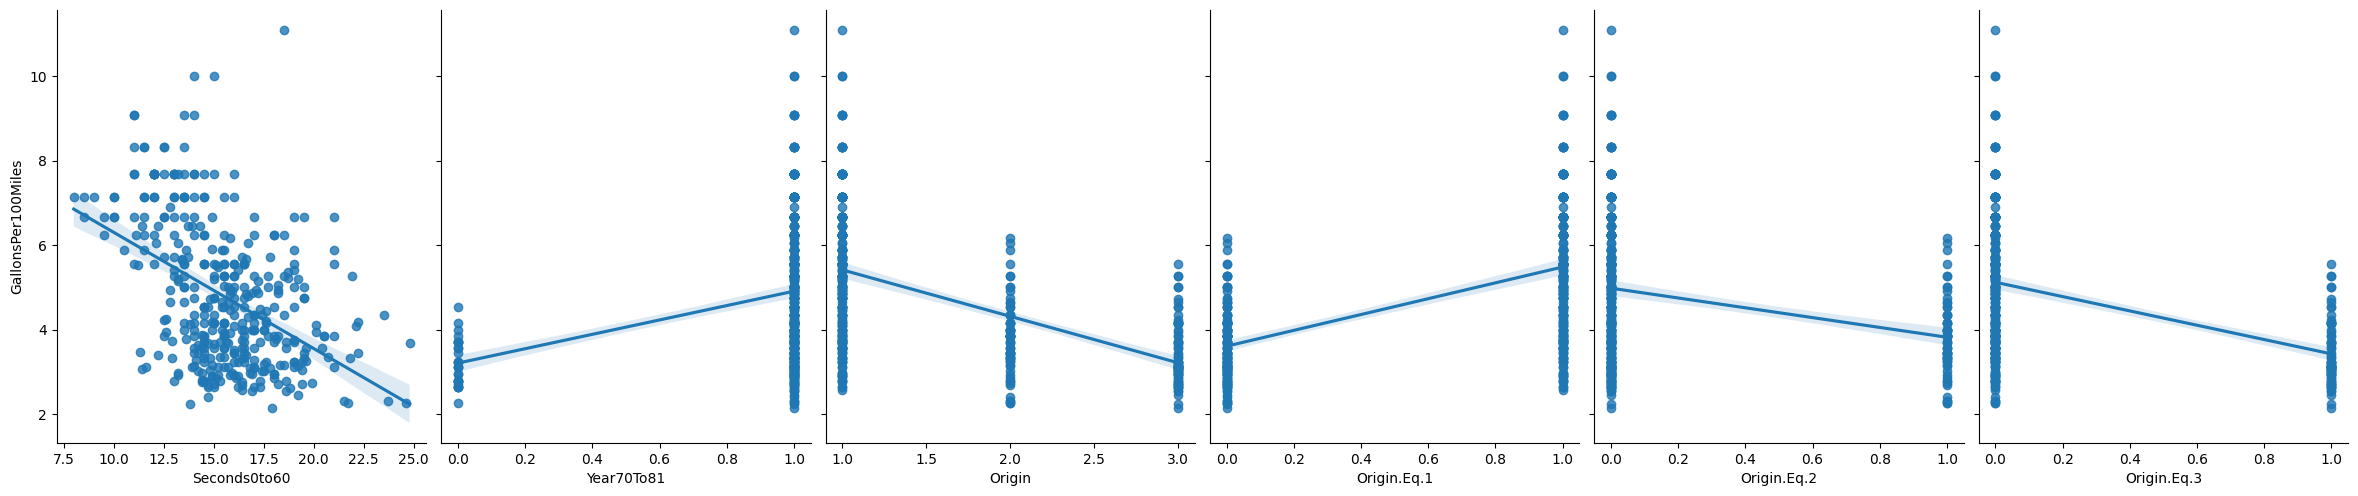

In [22]:
# we cant use these values, since their values are close to 0
sns.pairplot(df, x_vars=['Seconds0to60', 'Year70To81', 'Origin', 'Origin.Eq.1', 'Origin.Eq.2', 'Origin.Eq.3'], y_vars='GallonsPer100Miles', height=5, aspect=0.8, kind='reg')

In [ ]:
# these are the values we can use
sns.pairplot(df, x_vars=['GallonsPer100MilesTo1981', 'Cylinders', 'Displacement100ci', 'Horsepower100', 'Weight1000lb', 'Year'], y_vars='GallonsPer100Miles', height=5, aspect=0.8, kind='reg')

In [ ]:
# Creating the model
model = LinearRegression()

# Fitting the model
# This is where the training is happening. passing the values
model.fit(df[['GallonsPer100MilesTo1981', 'MPG', 'Cylinders', 'Displacement100ci', 'Horsepower100', 'Weight1000lb', 'Year']], df['GallonsPer100Miles'])  

# Coefficients and Intercept
coefficients = model.coef_ 
intercept = model.intercept_


In [ ]:
# Making predictions
predictions = model.predict(df[['GallonsPer100MilesTo1981', 'MPG', 'Cylinders', 'Displacement100ci', 'Horsepower100', 'Weight1000lb', 'Year']])

# Model Evaluation
r_squared = model.score(df[['GallonsPer100MilesTo1981', 'MPG', 'Cylinders', 'Displacement100ci', 'Horsepower100', 'Weight1000lb', 'Year']], df['GallonsPer100Miles'])
print("R-squared:", r_squared) 
# R-squared is commonly used as a measure to quantify how well a linear model captures the variability in the data.

# our model is successful

In [ ]:
print(predictions)

In [ ]:
test_data = {
    'GallonsPer100MilesTo1981':  [3.5, 4, 6.5, 5],
    'MPG': [17, 18, 19, 20],
    'Cylinders': [4, 6, 8, 3],
    'Displacement100ci': [3, 4, 4.5, 3.5],
    'Horsepower100': [1, 2, 1.5, 2.5],
    'Weight1000lb': [3, 4, 3.5, 4.5],
    'Year': [73, 74, 75, 76],
}
test_df = pd.DataFrame(test_data)

# Making prediction using the trained model
predicted_consumption = model.predict(test_df)

consumption = df['GallonsPer100Miles']
for i, consumption in enumerate(predicted_consumption):
    print(f"Predicted Consumption for Cars {i+1}: {consumption}")

### Extra testings: feed some new values into your model such that the values are 
###    - within the interpolation range. 
###    - from the extrapolation range

In [ ]:
print(df['Weight1000lb'].min())
print(df['Weight1000lb'].max())
print('----')
print(df['MPG'].min())
print(df['MPG'].max())
print('----')
print(df['Horsepower100'].min())
print(df['Horsepower100'].max())

interpolation range: 

In [ ]:
test_data = {
    'GallonsPer100MilesTo1981':  [3.5],
    'MPG': [10], #
    'Cylinders': [4],
    'Displacement100ci': [3],
    'Horsepower100': [2], #
    'Weight1000lb': [5], #
    'Year': [73],
}
test_df = pd.DataFrame(test_data)
predicted_consumption = model.predict(test_df)

consumption = df['GallonsPer100Miles']
for i, consumption in enumerate(predicted_consumption):
    print(f"Predicted Consumption for Cars {i+1}: {consumption}")

it is still within reasonable prediction range

----------------------------------------------

extrapolation range:

In [ ]:
test_data = {
    'GallonsPer100MilesTo1981':  [3.5],
    'MPG': [5], #
    'Cylinders': [4],
    'Displacement100ci': [3],
    'Horsepower100': [4], #
    'Weight1000lb': [10], #
    'Year': [73],
}
test_df = pd.DataFrame(test_data)
predicted_consumption = model.predict(test_df)

consumption = df['GallonsPer100Miles']
for i, consumption in enumerate(predicted_consumption):
    print(f"Predicted Consumption for Cars {i+1}: {consumption}")

it is also still in reasonable prediction range

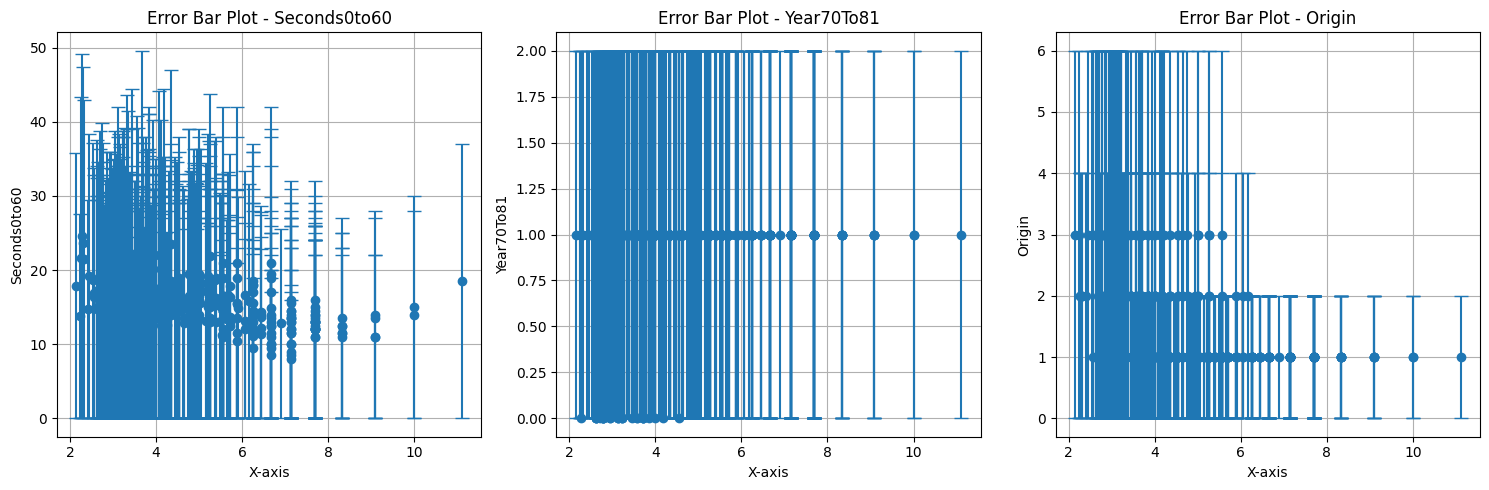

In [25]:
# Extract x-values
x = df['GallonsPer100Miles']

# Iterate through columns and create error bar plots
columns_of_interest = ['Seconds0to60', 'Year70To81', 'Origin']
num_columns = len(columns_of_interest)
fig, axs = plt.subplots(1, num_columns, figsize=(15, 5))  # Adjust the size of subplots as needed

for i, column in enumerate(columns_of_interest):
    y = df[column]
    errors = df[column]  # Replace this with your specific error values for each column
    
    axs[i].errorbar(x, y, yerr=errors, fmt='o', capsize=5)
    axs[i].set_xlabel('X-axis')
    axs[i].set_ylabel(column)
    axs[i].set_title(f'Error Bar Plot - {column}')
    axs[i].grid(True)

plt.tight_layout()  # Adjust the layout for better appearance
plt.show()

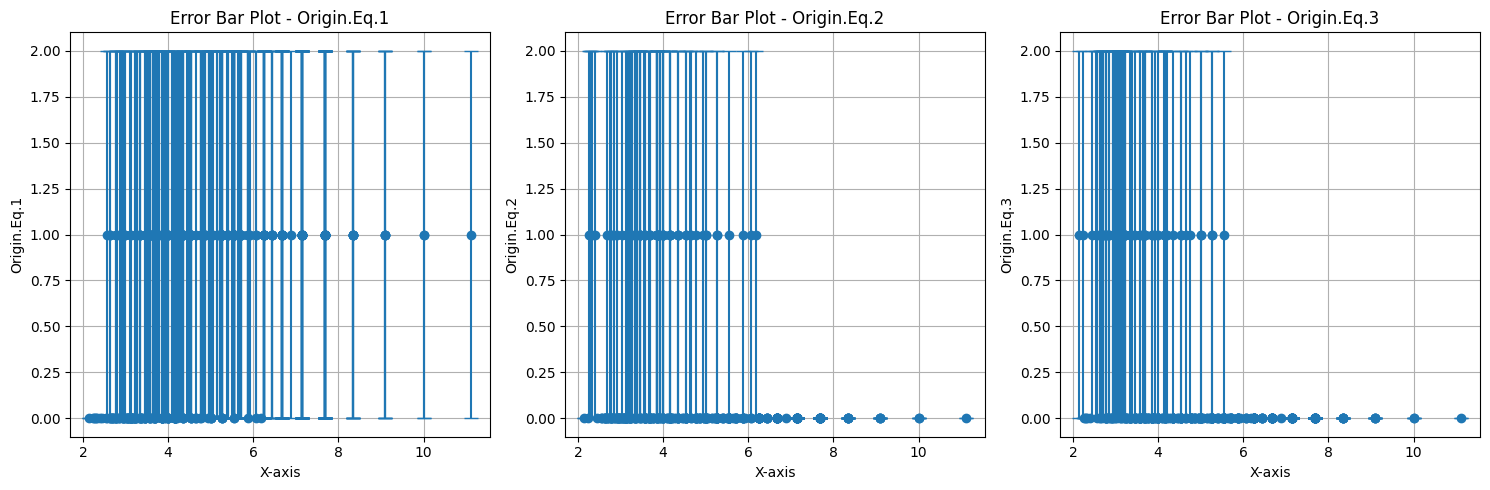

In [24]:
# Extract x-values
x = df['GallonsPer100Miles']

# Iterate through columns and create error bar plots
columns_of_interest = ['Origin.Eq.1', 'Origin.Eq.2', 'Origin.Eq.3']
num_columns = len(columns_of_interest)
fig, axs = plt.subplots(1, num_columns, figsize=(15, 5))  # Adjust the size of subplots as needed

for i, column in enumerate(columns_of_interest):
    y = df[column]
    errors = df[column]  # Replace this with your specific error values for each column
    
    axs[i].errorbar(x, y, yerr=errors, fmt='o', capsize=5)
    axs[i].set_xlabel('X-axis')
    axs[i].set_ylabel(column)
    axs[i].set_title(f'Error Bar Plot - {column}')
    axs[i].grid(True)

plt.tight_layout()  # Adjust the layout for better appearance
plt.show()